In [1]:
import numpy as np
import pandas as pd
import sys
from tensorflow.keras.utils import to_categorical # utils.to_categorical
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow .keras.layers import Dense, Input
import matplotlib.pyplot as plt

# Logistic Regression (binary classification)
## 1. Dataset 생성 & 전처리

In [2]:
df = pd.read_csv('data/pima-indians-diabetes.csv', comment = '#', header = None)
df.values[:2]
# 결측치 없으므로, csv파일을 바로 넘파이 배열로 읽어올 예정

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,
         31.   ,   0.   ]])

In [3]:
# np.set_printoptions(threshold = sys.maxsize)

In [4]:
# 1. 임신횟수
# 2. 2시간내 포도당 농도
# 3. 혈압
# 4. 피부접힘 두께
# 5. 인슐린수치
# 6. BMI체질량지수
# 7. 가족력
# 8. 나이
# 9. 당뇨병발병여부

In [5]:
# csv파일을 numpy 배열로 읽어오기 
# np.loadtxt(), np.genfromtxt() 
# 이 있는 행은 제외하고 읽어옴
# delimiter: 구분문자
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter = ',') 
dataset.shape

(768, 9)

In [6]:
# 학습데이터셋(학습용 데이터: train dataset): 모델 학습 시 사용
X_train = dataset[:700, :-1]
y_train = dataset[:700, -1]
# 테스트데이터셋(시험용 데이터: test dataset): 모델 평가 시 사용
X_test = dataset[700:, :-1]
y_test = dataset[700:, -1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 8), (700,), (68, 8), (68,))

## 2. Model 구성

In [7]:
model = Sequential()
model.add(Input(shape = (8, )))
model.add(Dense(units = 12, 
                activation = 'relu'))
model.add(Dense(units = 8, 
                activation = 'relu'))
model.add(Dense(units = 1,
                activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


## 3. Training Process 설정

In [8]:
# model.compile(loss = 'binary_crossentropy',
#               optimizer = 'adam',
#               metrics = ['accuracy'])
model.compile(loss      = 'binary_crossentropy',
              optimizer = 'adam',
              metrics   = ['binary_accuracy'])

## 4. Training

In [9]:
hist = model.fit(X_train, y_train, # train dataset
                 epochs = 200,
                 # batch_size = 350,
                 # validation_split = 0.2, # 검증 데이터 비율(훈련데이터셋 중 20%를 검증용 데이터로)
                 verbose = 1
                )

Epoch 1/200
22/22 [==============================] - 1s 6ms/step - loss: 3.7890 - binary_accuracy: 0.5429
Epoch 2/200
22/22 [==============================] - 0s 5ms/step - loss: 1.9142 - binary_accuracy: 0.5114
Epoch 3/200
22/22 [==============================] - 0s 5ms/step - loss: 1.3404 - binary_accuracy: 0.5157
Epoch 4/200
22/22 [==============================] - 0s 5ms/step - loss: 1.1405 - binary_accuracy: 0.5229
Epoch 5/200
22/22 [==============================] - 0s 4ms/step - loss: 0.9983 - binary_accuracy: 0.5643
Epoch 6/200
22/22 [==============================] - 0s 5ms/step - loss: 0.9021 - binary_accuracy: 0.6057
Epoch 7/200
22/22 [==============================] - 0s 5ms/step - loss: 0.8675 - binary_accuracy: 0.6014
Epoch 8/200
22/22 [==============================] - 0s 4ms/step - loss: 0.7912 - binary_accuracy: 0.6043
Epoch 9/200
22/22 [==============================] - 0s 5ms/step - loss: 0.7670 - binary_accuracy: 0.6171
Epoch 10/200
22/22 [==========================

22/22 [==============================] - 0s 5ms/step - loss: 0.5516 - binary_accuracy: 0.7400
Epoch 78/200
22/22 [==============================] - 0s 5ms/step - loss: 0.5459 - binary_accuracy: 0.7300
Epoch 79/200
22/22 [==============================] - 0s 4ms/step - loss: 0.5596 - binary_accuracy: 0.7114
Epoch 80/200
22/22 [==============================] - 0s 6ms/step - loss: 0.5548 - binary_accuracy: 0.7200
Epoch 81/200
22/22 [==============================] - 0s 5ms/step - loss: 0.5545 - binary_accuracy: 0.7286
Epoch 82/200
22/22 [==============================] - 0s 6ms/step - loss: 0.5527 - binary_accuracy: 0.7200
Epoch 83/200
22/22 [==============================] - 0s 5ms/step - loss: 0.5504 - binary_accuracy: 0.7214
Epoch 84/200
22/22 [==============================] - 0s 5ms/step - loss: 0.5582 - binary_accuracy: 0.7286
Epoch 85/200
22/22 [==============================] - 0s 5ms/step - loss: 0.5466 - binary_accuracy: 0.7414
Epoch 86/200
22/22 [==============================

22/22 [==============================] - 0s 6ms/step - loss: 0.5353 - binary_accuracy: 0.7400
Epoch 154/200
22/22 [==============================] - 0s 6ms/step - loss: 0.5165 - binary_accuracy: 0.7557
Epoch 155/200
22/22 [==============================] - 0s 6ms/step - loss: 0.5202 - binary_accuracy: 0.7471
Epoch 156/200
22/22 [==============================] - 0s 5ms/step - loss: 0.5106 - binary_accuracy: 0.7514
Epoch 157/200
22/22 [==============================] - 0s 6ms/step - loss: 0.5206 - binary_accuracy: 0.7471
Epoch 158/200
22/22 [==============================] - 0s 6ms/step - loss: 0.5212 - binary_accuracy: 0.7543
Epoch 159/200
22/22 [==============================] - 0s 5ms/step - loss: 0.5176 - binary_accuracy: 0.7571
Epoch 160/200
22/22 [==============================] - 0s 5ms/step - loss: 0.5138 - binary_accuracy: 0.7571
Epoch 161/200
22/22 [==============================] - 0s 5ms/step - loss: 0.5247 - binary_accuracy: 0.7300
Epoch 162/200
22/22 [=====================

## 5. Model 평가(학습과정 보기, 평가)

In [10]:
hist.history.keys()

dict_keys(['loss', 'binary_accuracy'])

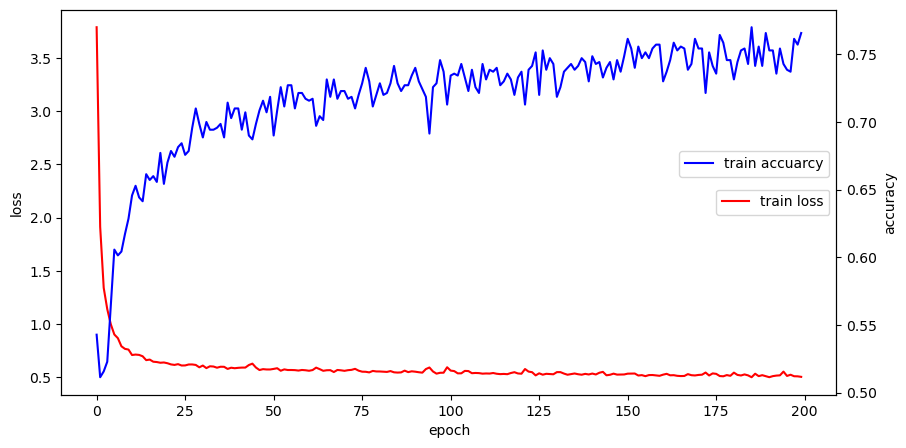

In [11]:
# 학습과정 표시하기(validation dataset 없는 경우)
fig, loss_ax = plt.subplots(figsize = (10, 5))
loss_ax.plot(hist.history['loss'], 'r', label = 'train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['binary_accuracy'], 'b', label = 'train accuarcy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc = 'center right')
acc_ax.legend(bbox_to_anchor = (0.999, 0.65))
plt.show()

In [20]:
# 모델 평가(X) 
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 5ms/step - loss: 0.4954 - binary_accuracy: 0.7614


[0.4953654706478119, 0.7614285945892334]

In [21]:
# 모델 평가(o)
score = model.evaluate(X_test, y_test)
print('loss: {}, accuracy:{}%'.format(score[0], score[1]*100))

3/3 [==============================] - 0s 8ms/step - loss: 0.6197 - binary_accuracy: 0.6765
loss: 0.6197272539138794, accuracy:67.64705777168274%


## 6. Model 사용하기

In [35]:
X_train[10], y_train[10]

(array([  4.   , 110.   ,  92.   ,   0.   ,   0.   ,  37.6  ,   0.191,
         30.   ]),
 0.0)

In [36]:
model.predict([[4, 110, 92, 0, 0, 37.6, 0.191, 30]])

1/1 [==============================] - 0s 49ms/step


array([[0.21552609]], dtype=float32)

In [37]:
(model.predict([[4, 110, 92, 0, 0, 37.6, 0.191, 30],
               [6, 148, 72, 35, 0, 33.6, 0.6, 50]]) > 0.5).astype(int)

1/1 [==============================] - 0s 52ms/step


array([[0],
       [0]])

## 7. Cross-Tabulation 교차표
- test dataset 의 실제값(y_test)와 예측값

In [45]:
y_hat = (model.predict(X_test) > 0.5).astype(float)
cnt1 = 0; cnt2 = 0; cnt3 = 0; cnt4 = 0
# y_hat.shape, y_test.shape
for h, y in zip(y_hat.reshape(-1), y_test.reshape(-1)):
    if h == 1.0 and y == 1.0:
        cnt1 += 1
    elif y == 1.0 and h == 0.0:
        cnt2 += 1
    elif y == 0.0 and h == 1.0:
        cnt3 += 1
    else:
        cnt4 += 1
print(cnt1, cnt2)
print(cnt3, cnt4)

3/3 [==============================] - 0s 3ms/step
10 17
5 36


In [49]:
ctab = pd.crosstab(y_test, y_hat.reshape(-1))
ctab.index.name = 'y'
ctab.columns.name = 'y_hat'
ctab

y_hat,0.0,1.0
y,,
0.0,36,5
1.0,17,10


# Multinomial Classification, 분류분석
```
1. Dataset (train 600 / validation 100 / test 68으로 분리), 종속변수의 One-Hot Encoding
2. Model 생성 (input 8, target 2): 출력층에서의 activation function은 'softmax'
3. Training Process 설정 (loss = 'categorical_crossentropy', metrics = ['accuracy'])
4. Training: validation_data = [X_val, Y_val] 추가
5. Model 평가: 그래프(hist.history.keys()를 확인 후 4가지)
               평가(X_test, Y_test)
               Cross-Tablulation 교차표(pd.crosstab 이용)
6. 모델 사용하기 - 예측
                  0       1
                  0.9912  0.00124
```

In [59]:
import numpy as np
import pandas as pd
import sys
from tensorflow.keras.utils import to_categorical # utils.to_categorical
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow .keras.layers import Dense, Input
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

### dataset

In [60]:
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter = ',')
dataset[:2]

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,
         31.   ,   0.   ]])

In [61]:
# train dataset
X_train = dataset[:600, :-1]
Y_train = dataset[:600, -1]
# validation dataset
X_val = dataset[600:700, :-1]
Y_val = dataset[600:700, -1]
# test dataset
X_test = dataset[700:, :-1]
Y_test = dataset[700:, -1]
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((600, 8), (600,), (100, 8), (100,), (68, 8), (68,))

### one-hot encoding

In [66]:
# One-Hot Encoding
onehot_Y_train = to_categorical(Y_train)
onehot_Y_val = to_categorical(Y_val)
onehot_Y_test = to_categorical(Y_test)
onehot_Y_train[:2], onehot_Y_val[:2], onehot_Y_test[:2]

(array([[0., 1.],
        [1., 0.]], dtype=float32),
 array([[1., 0.],
        [1., 0.]], dtype=float32),
 array([[1., 0.],
        [0., 1.]], dtype=float32))

### model 생성

In [67]:
# Model 생성
model = Sequential()
model.add(Input(shape = (8)))
model.add(Dense(units = 16,
                activation = 'relu'))
model.add(Dense(units = 128,
                activation = 'relu'))
model.add(Dense(units = 64,
                activation = 'relu'))
model.add(Dense(units = 2,
                activation = 'softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 16)                144       
                                                                 
 dense_47 (Dense)            (None, 128)               2176      
                                                                 
 dense_48 (Dense)            (None, 64)                8256      
                                                                 
 dense_49 (Dense)            (None, 2)                 130       
                                                                 
Total params: 10,706
Trainable params: 10,706
Non-trainable params: 0
_________________________________________________________________


### training process setting

In [68]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'nadam',
              metrics = ['accuracy'])

### training

In [69]:
hist = model.fit(X_train, onehot_Y_train, 
                 epochs = 200, 
                 verbose = 1, 
                 validation_data = [X_val, onehot_Y_val]
                )

Epoch 1/200
19/19 [==============================] - 1s 22ms/step - loss: 2.8550 - accuracy: 0.5150 - val_loss: 0.7441 - val_accuracy: 0.6800
Epoch 2/200
19/19 [==============================] - 0s 13ms/step - loss: 1.2939 - accuracy: 0.5667 - val_loss: 0.6636 - val_accuracy: 0.6500
Epoch 3/200
19/19 [==============================] - 0s 14ms/step - loss: 1.1853 - accuracy: 0.5750 - val_loss: 0.8310 - val_accuracy: 0.5200
Epoch 4/200
19/19 [==============================] - 0s 14ms/step - loss: 1.0123 - accuracy: 0.6333 - val_loss: 0.6811 - val_accuracy: 0.6000
Epoch 5/200
19/19 [==============================] - 0s 12ms/step - loss: 1.0391 - accuracy: 0.6067 - val_loss: 0.7915 - val_accuracy: 0.5500
Epoch 6/200
19/19 [==============================] - 0s 14ms/step - loss: 0.9970 - accuracy: 0.5933 - val_loss: 0.9735 - val_accuracy: 0.6600
Epoch 7/200
19/19 [==============================] - 0s 13ms/step - loss: 1.0017 - accuracy: 0.6117 - val_loss: 0.9585 - val_accuracy: 0.6700
Epoch 

19/19 [==============================] - 0s 13ms/step - loss: 0.5257 - accuracy: 0.7300 - val_loss: 0.6094 - val_accuracy: 0.7100
Epoch 59/200
19/19 [==============================] - 0s 12ms/step - loss: 0.4970 - accuracy: 0.7400 - val_loss: 0.5956 - val_accuracy: 0.7300
Epoch 60/200
19/19 [==============================] - 0s 11ms/step - loss: 0.5037 - accuracy: 0.7500 - val_loss: 0.5947 - val_accuracy: 0.7400
Epoch 61/200
19/19 [==============================] - 0s 13ms/step - loss: 0.5219 - accuracy: 0.7417 - val_loss: 0.7830 - val_accuracy: 0.5500
Epoch 62/200
19/19 [==============================] - 0s 13ms/step - loss: 0.5510 - accuracy: 0.7033 - val_loss: 0.9019 - val_accuracy: 0.5600
Epoch 63/200
19/19 [==============================] - 0s 12ms/step - loss: 0.5510 - accuracy: 0.7233 - val_loss: 0.6128 - val_accuracy: 0.7100
Epoch 64/200
19/19 [==============================] - 0s 12ms/step - loss: 0.5290 - accuracy: 0.7400 - val_loss: 0.5971 - val_accuracy: 0.7200
Epoch 65/200

19/19 [==============================] - 0s 13ms/step - loss: 0.4264 - accuracy: 0.7933 - val_loss: 0.6438 - val_accuracy: 0.7100
Epoch 116/200
19/19 [==============================] - 0s 14ms/step - loss: 0.4428 - accuracy: 0.7800 - val_loss: 0.5774 - val_accuracy: 0.7300
Epoch 117/200
19/19 [==============================] - 0s 13ms/step - loss: 0.4407 - accuracy: 0.7817 - val_loss: 0.5786 - val_accuracy: 0.7000
Epoch 118/200
19/19 [==============================] - 0s 14ms/step - loss: 0.4168 - accuracy: 0.8000 - val_loss: 0.6517 - val_accuracy: 0.7100
Epoch 119/200
19/19 [==============================] - 0s 15ms/step - loss: 0.4564 - accuracy: 0.7900 - val_loss: 0.6293 - val_accuracy: 0.7000
Epoch 120/200
19/19 [==============================] - 0s 14ms/step - loss: 0.4724 - accuracy: 0.7817 - val_loss: 0.6080 - val_accuracy: 0.6900
Epoch 121/200
19/19 [==============================] - 0s 14ms/step - loss: 0.4186 - accuracy: 0.7817 - val_loss: 0.6062 - val_accuracy: 0.7200
Epoch 

Epoch 172/200
19/19 [==============================] - 0s 14ms/step - loss: 0.3763 - accuracy: 0.8300 - val_loss: 0.6197 - val_accuracy: 0.7500
Epoch 173/200
19/19 [==============================] - 0s 13ms/step - loss: 0.3688 - accuracy: 0.8167 - val_loss: 0.6466 - val_accuracy: 0.7500
Epoch 174/200
19/19 [==============================] - 0s 14ms/step - loss: 0.3738 - accuracy: 0.8083 - val_loss: 0.6439 - val_accuracy: 0.7100
Epoch 175/200
19/19 [==============================] - 0s 14ms/step - loss: 0.3639 - accuracy: 0.8283 - val_loss: 0.6655 - val_accuracy: 0.7200
Epoch 176/200
19/19 [==============================] - 0s 13ms/step - loss: 0.4218 - accuracy: 0.7883 - val_loss: 0.7038 - val_accuracy: 0.6800
Epoch 177/200
19/19 [==============================] - 0s 13ms/step - loss: 0.3568 - accuracy: 0.8267 - val_loss: 0.6837 - val_accuracy: 0.6600
Epoch 178/200
19/19 [==============================] - 0s 14ms/step - loss: 0.3821 - accuracy: 0.8283 - val_loss: 0.6439 - val_accuracy:

### Model 평가

In [70]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

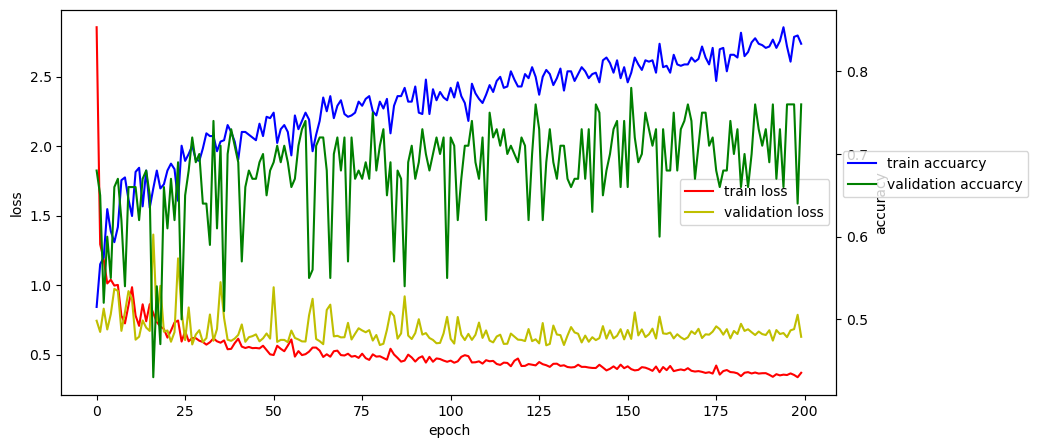

In [72]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize = (10, 5))
loss_ax.plot(hist.history['loss'], 'r', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label = 'validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label = 'train accuarcy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'validation accuarcy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc = 'center right')
acc_ax.legend(bbox_to_anchor = (0.999, 0.65))
plt.show()